In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/housing.csv") 

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4    NOX      506 non-null    float64
 5   RM        500 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9    TAX      506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11   B        506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing[' CRIM '].value_counts()

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name:  CRIM , Length: 504, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.28585,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.70379,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.56100,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.88650,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.20850,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.62050,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa779fe3fd0>,
      dtype=object)

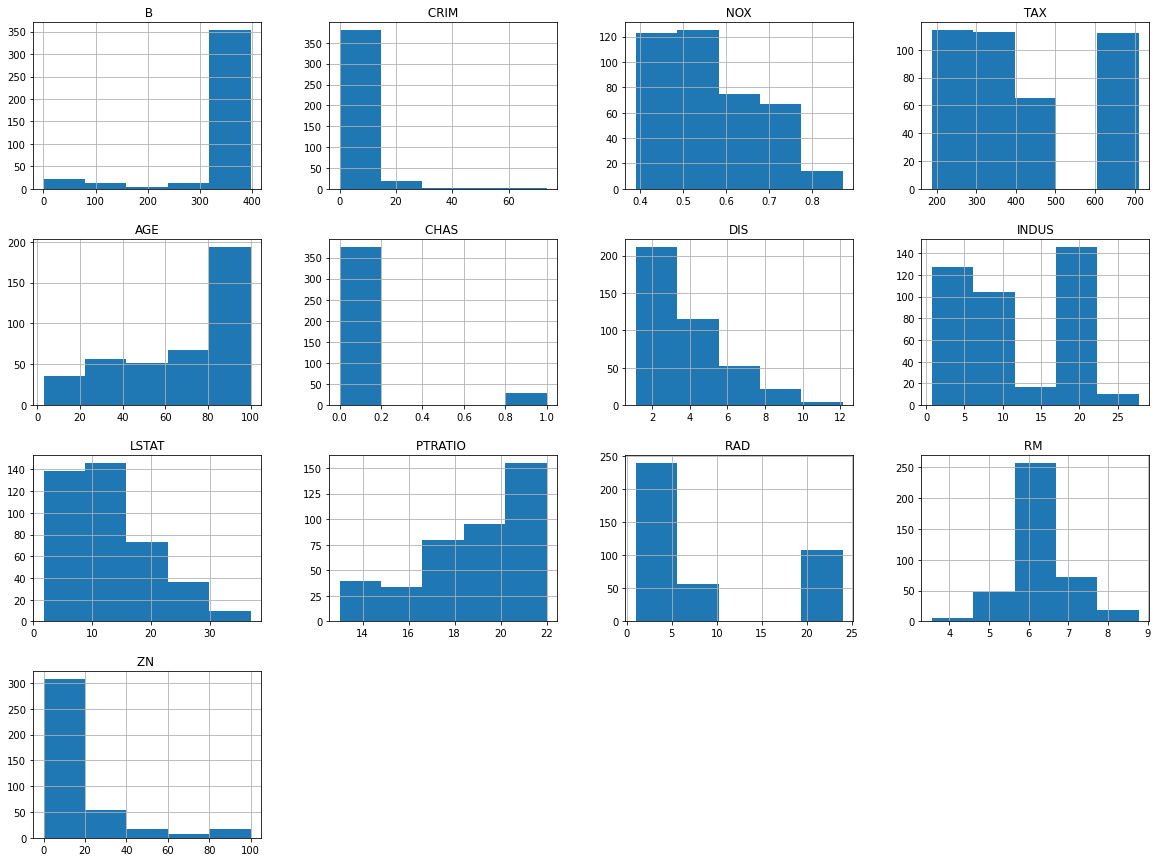

In [ ]:
housing.hist(bins=5,figsize=(20,15))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  print(shuffled)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices] ,data.iloc[test_indices]
 #return data.ilon[test_indices]

In [ ]:
'''train_set, test_set = split_train_test(housing,0.2)
print(len(train_set))
print(len(test_set))'''

'train_set, test_set = split_train_test(housing,0.2)\nprint(len(train_set))\nprint(len(test_set))'

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

404
102


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS ']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.296850,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.665861,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.903250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.165500,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.538500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing = strat_train_set.copy()
strat_train_set['CHAS '].value_counts()

0    376
1     28
Name: CHAS , dtype: int64

In [ ]:
coor_matrix = housing.corr()
coor_matrix['MEDV '].sort_values(ascending=False)

MEDV        1.000000
RM          0.679789
 B          0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
 CRIM      -0.393715
 NOX       -0.422873
 TAX       -0.456657
INDUS      -0.473516
PTRATIO    -0.493534
LSTAT      -0.740494
Name: MEDV , dtype: float64

In [ ]:
'''from pandas.plotting import scatter_matrix
attributes = ["MEDV ","RM ","ZN ","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))'''

'from pandas.plotting import scatter_matrix\nattributes = ["MEDV ","RM ","ZN ","LSTAT"]\nscatter_matrix(housing[attributes],figsize = (12,8))'

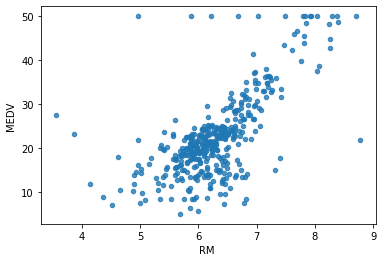

In [ ]:
housing.plot(kind="scatter",x="RM ",y="MEDV ",alpha=0.8)

In [ ]:
housing["TAXRM"] =housing[' TAX ']/housing['RM '] 
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [ ]:
coor_matrix = housing.corr()
coor_matrix['MEDV '].sort_values(ascending=False)

MEDV        1.000000
RM          0.679789
 B          0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
 CRIM      -0.393715
 NOX       -0.422873
 TAX       -0.456657
INDUS      -0.473516
PTRATIO    -0.493534
TAXRM      -0.525913
LSTAT      -0.740494
Name: MEDV , dtype: float64

In [ ]:
#housing.plot(kind="scatter",x="TAXRM",y="MEDV ",alpha=0.8)

In [ ]:
housing = strat_train_set.drop("MEDV ",axis=1)
housing_lable = strat_train_set["MEDV "].copy()

In [ ]:
a=housing.dropna(subset=["RM "])
a.shape

(400, 13)

In [ ]:
median = housing["RM "].median()
median

6.2135

In [ ]:
housing["RM "].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM , Length: 404, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median" )
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_ 

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [ ]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282411,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710215,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
                        ('imputer',SimpleImputer(strategy="median")),
                        ('std_scaler',StandardScaler()),
])


In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)


In [ ]:
housing_num_tr.shape

(404, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr , housing_lable)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = housing.iloc[:5]
some_lable = housing_lable.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([23.92046561, 27.23358482, 20.55935306, 25.05351378, 23.77481146])

In [ ]:
list(some_lable)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_lable,housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
lin_mse

23.216224409730504

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_lable,scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([4.20075773, 4.48746536, 4.94316393, 6.31443288, 5.28067296])

In [ ]:
def print_scores(scores):
  print("scores",scores)
  print("mean",scores.mean())
  print("standared devation",scores.std())

In [ ]:
print_scores(rmse_scores)

scores [4.20075773 4.48746536 4.94316393 6.31443288 5.28067296]
mean 5.045298571199057
standared devation 0.7349777701998186


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(housing_num_tr , housing_lable)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
some_data = housing.iloc[:5]
some_lable = housing_lable.iloc[:5]

In [ ]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [ ]:
list(some_lable)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_lable,housing_prediction)
rmse = np.sqrt(mse)

In [ ]:
rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_lable,scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([4.88885101, 4.07965443, 5.14912194, 5.48251992, 5.04592657])

In [ ]:
def print_scores(scores):
  print("scores",scores)
  print("mean",scores.mean())
  print("standared devation",scores.std())

In [ ]:
print_scores(rmse_scores)

scores [4.88885101 4.07965443 5.14912194 5.48251992 5.04592657]
mean 4.929214775515286
standared devation 0.46722786948873274


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_lable)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
some_data = housing.iloc[:5]
some_lable = housing_lable.iloc[:5]

In [ ]:
model.predict(prepared_data)

array([22.447, 25.989, 16.523, 23.398, 23.388])

In [ ]:
list(some_lable)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_lable,housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_lable,scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([2.87047276, 3.46086822, 3.13638274, 4.14879379, 3.42555707])

In [ ]:
def print_scores(scores):
  print("scores",scores)
  print("mean",scores.mean())
  print("standared devation",scores.std())

In [ ]:
print_scores(rmse_scores)

scores [2.87047276 3.46086822 3.13638274 4.14879379 3.42555707]
mean 3.4084149146467495
standared devation 0.4276889861847161
